<a href="https://colab.research.google.com/github/PhonxayMax/PhonxayMax1/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

<ipython-input-2-93e2626d8a4a>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

<ipython-input-3-475911aa0aa9>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [4]:
import torch

In [5]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
                             [3, 4,],
                             [5, 6,],
                             [7, 8,]])
#You don't have to format it like I did, thats just for clarity
torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3],
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9],
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15],
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21],
                            [22, 23, 24],
                            ]
                              ])

In [6]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


In [7]:
x_np = np.random.random((4,4))
print(x_np)

[[0.04774691 0.14281704 0.88998092 0.89461539]
 [0.10385223 0.02388569 0.19672369 0.12916534]
 [0.35031075 0.94452757 0.22429504 0.13381855]
 [0.94688865 0.07453168 0.7983369  0.94355932]]


In [8]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.0477, 0.1428, 0.8900, 0.8946],
        [0.1039, 0.0239, 0.1967, 0.1292],
        [0.3503, 0.9445, 0.2243, 0.1338],
        [0.9469, 0.0745, 0.7983, 0.9436]], dtype=torch.float64)


In [9]:
print(x_np.dtype, x_pt.dtype)

float64 torch.float64


In [10]:
#Lets force them to be 32-bit floats
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float32 torch.float32


In [11]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[False False  True  True]
 [False False False False]
 [False  True False False]
 [ True False  True  True]]
bool


In [12]:
b_pt = (x_pt > 0.5)
print(b_pt)
print(b_pt.dtype)

tensor([[False, False,  True,  True],
        [False, False, False, False],
        [False,  True, False, False],
        [ True, False,  True,  True]])
torch.bool


In [13]:
np.sum(x_np)

6.8450556

In [14]:
torch.sum(x_pt)

tensor(6.8451)

In [15]:
np.transpose(x_np)

array([[0.04774691, 0.10385223, 0.35031074, 0.9468886 ],
       [0.14281705, 0.02388569, 0.94452757, 0.07453168],
       [0.8899809 , 0.1967237 , 0.22429504, 0.7983369 ],
       [0.8946154 , 0.12916534, 0.13381855, 0.94355935]], dtype=float32)

In [16]:
torch.transpose(x_pt, 0, 1)

tensor([[0.0477, 0.1039, 0.3503, 0.9469],
        [0.1428, 0.0239, 0.9445, 0.0745],
        [0.8900, 0.1967, 0.2243, 0.7983],
        [0.8946, 0.1292, 0.1338, 0.9436]])

In [17]:
print(torch.transpose(torch_tensor3d, 0, 2).shape)

torch.Size([3, 2, 4])


In [18]:
import timeit
x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)

In [19]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


In [20]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)

In [21]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj

some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(moveTo(some_tensors, device))

[tensor(1), tensor(2)]
[tensor(1, device='cuda:0'), tensor(2, device='cuda:0')]


<Axes: >

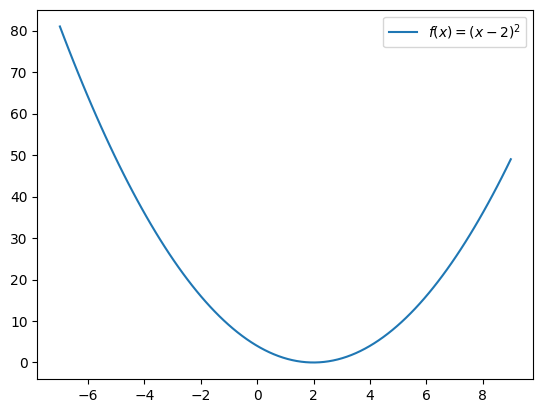

In [22]:
def f(x):
    return torch.pow((x-2.0), 2)

x_axis_vals = np.linspace(-7,9,100)
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')

<Axes: >

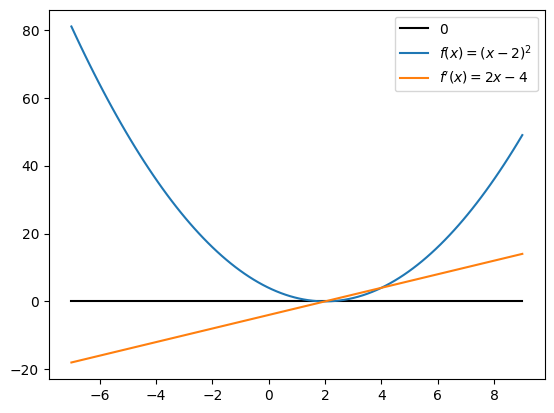

In [23]:
def fP(x): #Defining the derivative of f(x) manually
    return 2*x-4

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x=x_axis_vals, y=[0.0]*len(x_axis_vals), label="0", color='black')
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x) = (x-2)^2$')
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="$f'(x)=2 x - 4$")

In [24]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)

None


In [25]:
value = f(x)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [26]:
value.backward()
print(x.grad)

tensor([-11.])


In [27]:
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100 #Make the initial "previous" solution larger
epsilon = 1e-5
eta = 0.1

while torch.linalg.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() #We need to make a clone here so that x_prev and x_cur don't point to the same object

    #Compute our function, gradient, and update
    value = f(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() #We need to zero out the old gradient, as py-torch will not do that for us

    #What are we currently now?
    x_cur = x.data

print(x_cur)

tensor([2.0000])


In [28]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)

In [29]:
optimizer = torch.optim.SGD([x_param], lr=eta)

In [30]:
for epoch in range(60):
    optimizer.zero_grad() #x.grad.zero_()
    loss_incurred  = f(x_param)
    loss_incurred.backward()
    optimizer.step() #x.data -= eta * x.grad
print(x_param.data)

tensor([2.0000])


In [31]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

(70000, 784)


In [34]:
class SimpleDataset(Dataset):

    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y

    def __getitem__(self, index):
        #This "work" could have gone in the constructor, but you should get into
        inputs = torch.tensor(self.X.iloc[index].values, dtype=torch.float32)
        targets = torch.tensor(int(self.y.iloc[index]), dtype=torch.int64)
        return inputs, targets

    def __len__(self):
        return self.X.shape[0]
#Now we can make a PyTorch dataset
dataset = SimpleDataset(X, y)

In [35]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)

Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


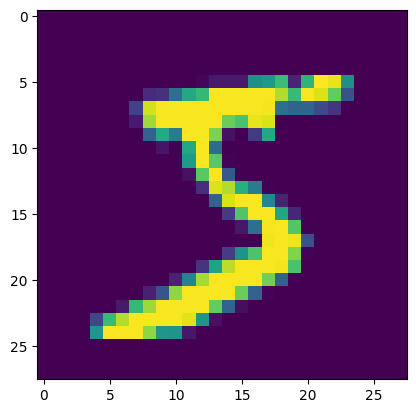

In [36]:
plt.imshow(example.reshape((28,28)))

In [37]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))

56000 examples for training and 14000 for testing


In [38]:
from tqdm.autonotebook import tqdm

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import time

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *


In [41]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)

torch.backends.cudnn.deterministic=True
set_seed(42)

<ipython-input-41-e4cdacba7907>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [42]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device="cpu"):
    #Yellow step is done here. We create the optimizer and move the model to the compute device
    #SGD is Stochastic Gradient Decent over the parameters $\Theta$
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    #The next two for loops handle the Red steps, iterating through all the data (batches) multiple times (epochs)
    for epoch in tqdm(range(epochs), desc="Epoch"):

        model = model.train()#Put our model in training mode
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            #Move the batch of data to the device we are using. this is the last red step
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)

            #First a yellow step, prepare the optimizer. Most PyTorch code will do this first to make sure everything is in a clean and ready state.

            #PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it.
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #The next two lines of code perform the two blue steps
            y_hat = model(inputs) #this just computed $f_\theta(\boldsymbol{x_i})$

            # Compute loss.
            loss = loss_func(y_hat, labels)

            #Now the remaining two yellow steps, compute the gradient and ".step()" the optimizer
            loss.backward()# $\nabla_\Theta$ just got computed by this one call

            #Now we just need to update all the parameters
            optimizer.step()# $\Theta_{k+1} = \Theta_k − \eta \cdot \nabla_\Theta \ell(\hat{y}, y)$

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item()
#Caption: This code defines a simple training loop, which can be used to learn the parameters $\Theta$ to almost any neural network $f_\Theta(\cdot)$ we will use in this book.

<Axes: >

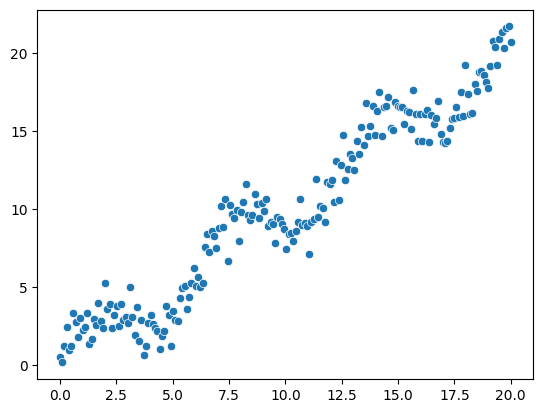

In [43]:
#Crate a 1-dimensional input
X = np.linspace(0, 20, num=200)
#create an output
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)

In [44]:
class Simple1DRegressionDataset(Dataset):

    def __init__(self, X, y):
        super(Simple1DRegressionDataset, self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)


    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)

In [45]:
in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)
loss_func = nn.MSELoss()

device = torch.device("cuda")
train_simple_network(model, loss_func, training_loader, device=device)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

In [46]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

<Axes: >

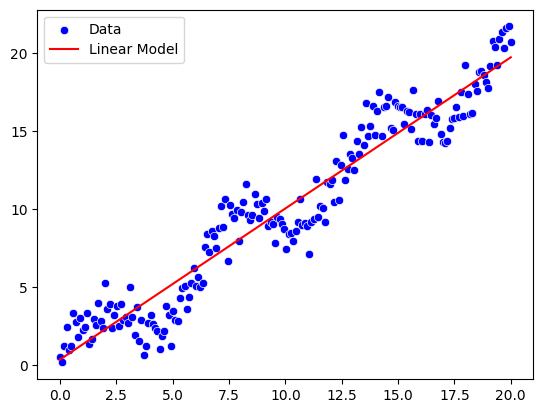

In [47]:
sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model') #What our model learned

In [48]:
#Input "layer" is implicitly the input
model = nn.Sequential(
    nn.Linear(1,  10), #Hidden layer
    nn.Linear(10, 1), #Output layer
)

train_simple_network(model, loss_func, training_loader)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

<Axes: >

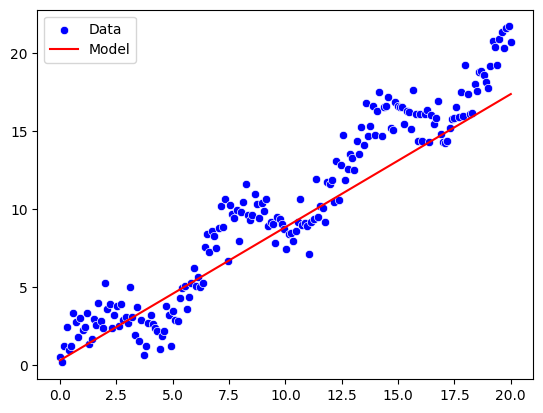

In [49]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), dtype=torch.float32)).cpu().numpy() #Shape of (N, 1)

sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Model') #What our model learned

Text(0, 0.5, 'Activation')

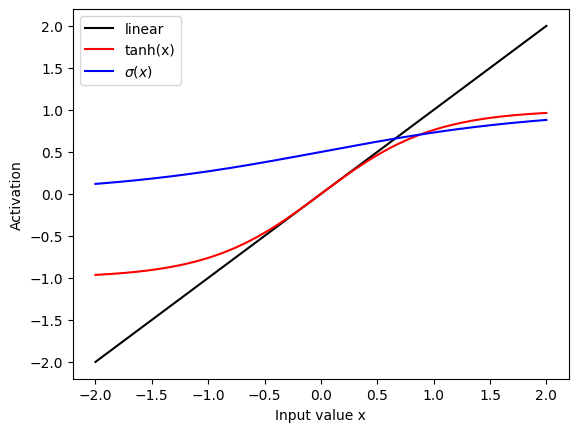

In [50]:
activation_input = np.linspace(-2, 2, num=200)
tanh_activation = np.tanh(activation_input)
sigmoid_activation = np.exp(activation_input)/(np.exp(activation_input)+1)
sns.lineplot(x=activation_input, y=activation_input, color='black', label="linear")
sns.lineplot(x=activation_input, y=tanh_activation, color='red', label="tanh(x)")
ax = sns.lineplot(x=activation_input, y=sigmoid_activation, color='blue', label="$\sigma(x)$")
ax.set_xlabel('Input value x')
ax.set_ylabel('Activation')